In [1]:
library(bnlearn)


Attaching package: ‘bnlearn’

The following object is masked from ‘package:stats’:

    sigma



# data loading and y as factor

In [28]:
dataset <- read.csv("datasets/spam_base/data.csv",header=FALSE,sep=";")
names <- read.csv("datasets/spam_base/names.csv",header=FALSE,sep=";")
names(dataset) <- sapply((1:nrow(names)),function(i) toString(names[i,1]))
dataset$y = as.factor(dataset$y)

In [29]:
dataset

word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,y
0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.000,0.000,0.000,0.778,0.000,0.000,3.756,61,278,1
0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.000,0.132,0.000,0.372,0.180,0.048,5.114,101,1028,1
0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.010,0.143,0.000,0.276,0.184,0.010,9.821,485,2259,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.137,0.000,0.137,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.000,0.135,0.000,0.135,0.000,0.000,3.537,40,191,1
0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.000,0.223,0.000,0.000,0.000,0.000,3.000,15,54,1
0.00,0.00,0.00,0,1.92,0.00,0.00,0.00,0.00,0.64,⋯,0.000,0.054,0.000,0.164,0.054,0.000,1.671,4,112,1
0.00,0.00,0.00,0,1.88,0.00,0.00,1.88,0.00,0.00,⋯,0.000,0.206,0.000,0.000,0.000,0.000,2.450,11,49,1
0.15,0.00,0.46,0,0.61,0.00,0.30,0.00,0.92,0.76,⋯,0.000,0.271,0.000,0.181,0.203,0.022,9.744,445,1257,1
0.06,0.12,0.77,0,0.19,0.32,0.38,0.00,0.06,0.00,⋯,0.040,0.030,0.000,0.244,0.081,0.000,1.729,43,749,1


# Binarizing columns by relation to mean

In [30]:
for(col in names(dataset)[-length(names(dataset))]){ #all except y
    avg = mean(dataset[, col])
    dataset[col] = as.factor(dataset[col] >= avg)
    }

In [31]:
dataset

word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,⋯,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,y
FALSE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,1
TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,1
FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,1
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1
FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,1
TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,⋯,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE,TRUE,1
FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,1


# Naive bayes fitting, 10 runs of 10 k-fold CV

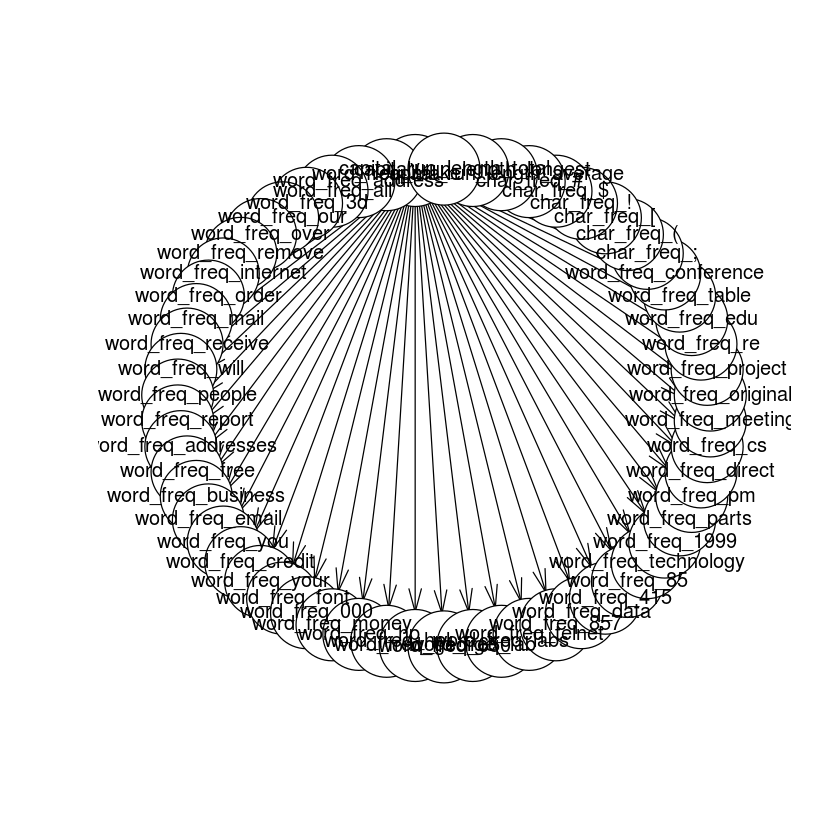

In [34]:
net = naive.bayes(dataset, 'y')
plot(net)

In [36]:
bn.cv(dataset, bn = net, runs=10, loss="pred-lw", loss.args = list(target = "y"))


  k-fold cross-validation for Bayesian networks

  target network structure:
   [Naive Bayes Classifier]
  number of folds:                       10 
  loss function:                         Classification Error (Posterior, disc.) 
  training node:                         y 
  number of runs:                        10 
  average loss over the runs:            0.09760922 
  standard deviation of the loss:        0.0002796531 


Woot! 90% accuracy with very low std!